# Problem Statement
This dataset contains information about used cars listed on www.cardekho.com.  
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.  

# Description:  
The columns in the given dataset are as follows:
1. name  
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# other relevant packages will be imported when necessary

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#checking structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
#checking summary statistics of data
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.shape

(4340, 8)

In [7]:
# checking for missing values
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Observations
1. The column name won't be of any help in the analysis, except for which company's car are more in no with CarDekho.  
2. Even cars before my birth are sold in Cardekho, least year is 1992.  
3. Both numeric columns selling_price and km_driven are in same range let's look whether there is any need for scaling of these features upon analysis.  
4. There aren't any missing values.  
5. Features like fuel, seller_type ,transmission and owner need processing:  
* fuel, seller_type and transmission should be one hot encoded.  
* owner needs to be label encoded.

In [8]:
#no. of cars by company
car = []
for i in range(len(df)):
    car.append(df["name"][i].split()[0])

In [9]:
 for i in set(car):
        print(i, car.count(i))

Ford 238
Volkswagen 107
OpelCorsa 2
Force 1
Honda 252
Skoda 68
Chevrolet 188
Volvo 4
Land 5
Maruti 1280
Audi 60
Daewoo 1
Isuzu 1
Renault 146
Mahindra 365
Jaguar 6
MG 2
Ambassador 4
Hyundai 821
Fiat 37
Kia 1
Toyota 206
Mercedes-Benz 35
Jeep 3
Mitsubishi 6
Tata 361
Datsun 37
Nissan 64
BMW 39


In [10]:
df["name"]=pd.Series(car) #can be used for further analysis
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Observations:  
1. CarDekho has most Maruti cars followed by Hyundai in it's stock.  
2. There are few Cars whose companies aren't very popular or are new in market so <10 no. of cars can be seen in such cases.  
3. Chevrolet cars are aroung 190 as their services are no longer available in india so it seems people sold such cars.  

In [11]:
# Unique values in fuel
df["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [12]:
# i'll be Combining (CNG and LPG) to CNG
df["fuel"][df.fuel.isin(["CNG","LPG"])]="CNG"

In [13]:
# verifying
df["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           63
Electric       1
Name: fuel, dtype: int64

In [14]:
# I'll be dropping this single row as this will add a new option while deployment and we face lack of data for modelling
df.query("fuel == 'Electric'")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4145,Toyota,2006,310000,62000,Electric,Dealer,Automatic,Second Owner


In [15]:
df.drop(4145,inplace=True)
df.reset_index(drop=True,inplace=True)

In [16]:
#verifying index resetting
df.iloc[4145,:]

name                  Hyundai
year                     2007
selling_price          212000
km_driven               58000
fuel                   Diesel
seller_type            Dealer
transmission           Manual
owner            Second Owner
Name: 4145, dtype: object

In [17]:
# unique values in seller_type
df.seller_type.value_counts()

Individual          3244
Dealer               993
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [18]:
# converting Trustmark Dealer to Dealer
df["seller_type"][df["seller_type"] == "Trustmark Dealer"] = "Dealer"

In [19]:
#verifying the changes
df.seller_type.value_counts()

Individual    3244
Dealer        1095
Name: seller_type, dtype: int64

In [20]:
#unique values in transmission
df.transmission.value_counts()

Manual       3892
Automatic     447
Name: transmission, dtype: int64

In [21]:
#unique values in owner
df.owner.value_counts()

First Owner             2832
Second Owner            1105
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [22]:
# test cars have more than 4 owners so converting "Test Drive Car" to "Fourth & Above Owner"
df["owner"][df["owner"] == "Test Drive Car"] = "Fourth & Above Owner"

In [23]:
df.owner.value_counts()

First Owner             2832
Second Owner            1105
Third Owner              304
Fourth & Above Owner      98
Name: owner, dtype: int64

In [24]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner'], dtype=object)

In [25]:
# label encoding for owner 1>2>3>4
for i in range(len(df["owner"])):
    if df["owner"][i] == "First Owner":
        df["owner"][i] = 1
    elif df["owner"][i] == "Second Owner":
        df["owner"][i] = 2
    elif df["owner"][i] == "Third Owner":
        df["owner"][i] = 3
    else:
        df["owner"][i] = 4

In [26]:
#comparing with original 
df.owner.value_counts()

1    2832
2    1105
3     304
4      98
Name: owner, dtype: int64

In [27]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda,2014,450000,141000,Diesel,Individual,Manual,2


# Graphical Analysis

**Q. For year**

<AxesSubplot:xlabel='count', ylabel='year'>

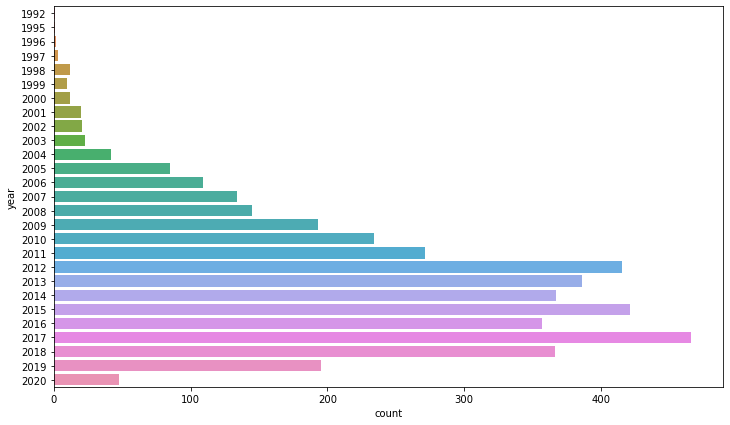

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,y="year")

# Observations
1. There had been steadily increase in selling of cars till 2017, but after that is is decreasing sharply. It can be thought of as people whatever of their ownership no. tend to use the car for at least a year.  
2. It can also be thought of as people not buying personal vehicles as the traffic conditions are getting worse day by day.  

**Q. How many cars with different fuel base  were sold in the previous years.**

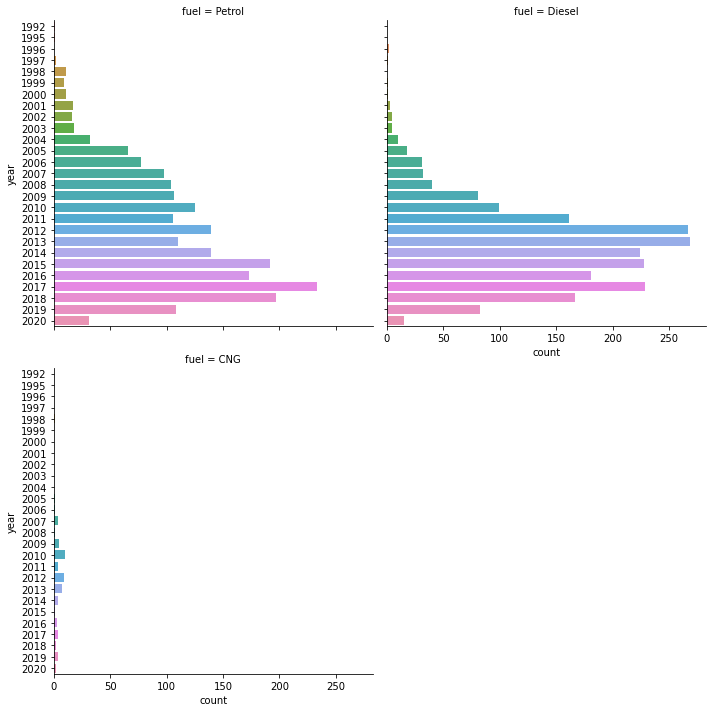

In [29]:
sns.catplot(data=df,y="year", col="fuel",kind="count", col_wrap=2)

# Observations
1. Gas based cars emeged after 2007 and is somehow surviving in the market.  
2. Diesel Based cars seems to be more popular than petrol cars till the year 2015, but after that there isn't very much diffence in the no. of cars sold for both Petrol and Diesel.  
3. Diesel based cars started gaining market after 2000 but before that petrol based cars were used mostly used.  

**Q. Is market Shifting to automatic based transmission** 

<AxesSubplot:xlabel='count', ylabel='year'>

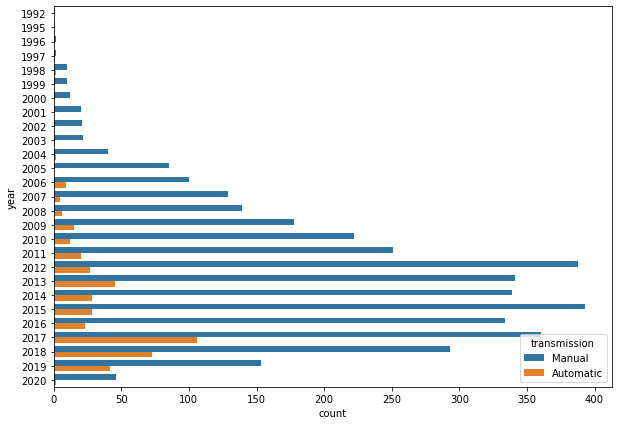

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(data = df, y="year", hue="transmission")

# Observations 
1. It seems that popularity of automatic was very high as new more cost efficient cars are introduced frequently. But still it's part of automobile market.  
2. There is a similar decrease pattern foud in case of Manual Transmission in the past 4 years.

**Q. People prefer which type of fuel base ?**

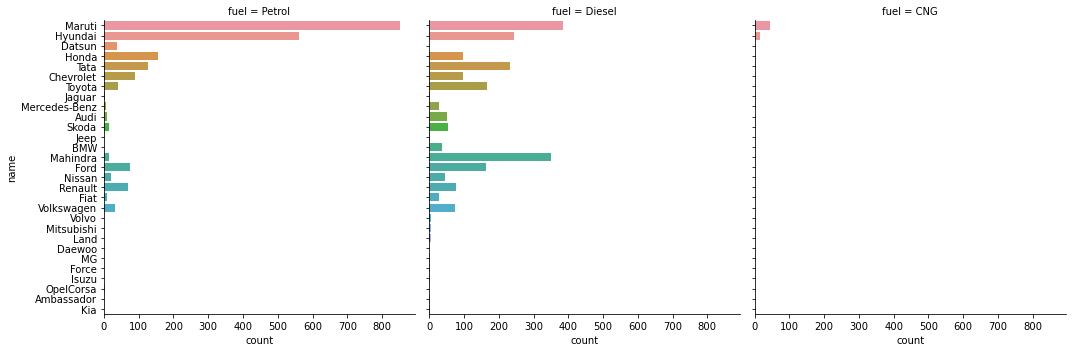

In [31]:
sns.catplot(data=df,y="name",col="fuel", kind = "count")

# Observations:
1. People prefer Mahindra's Diesel based cars compared to it's Petrol based cars as their mid-class cars are quite popular.  
2. Premium cars come mostly in petrol variant.  
3. Only Maruti and Hyundai Gas based cars are available.  

**Q Distribution of Price**

[]

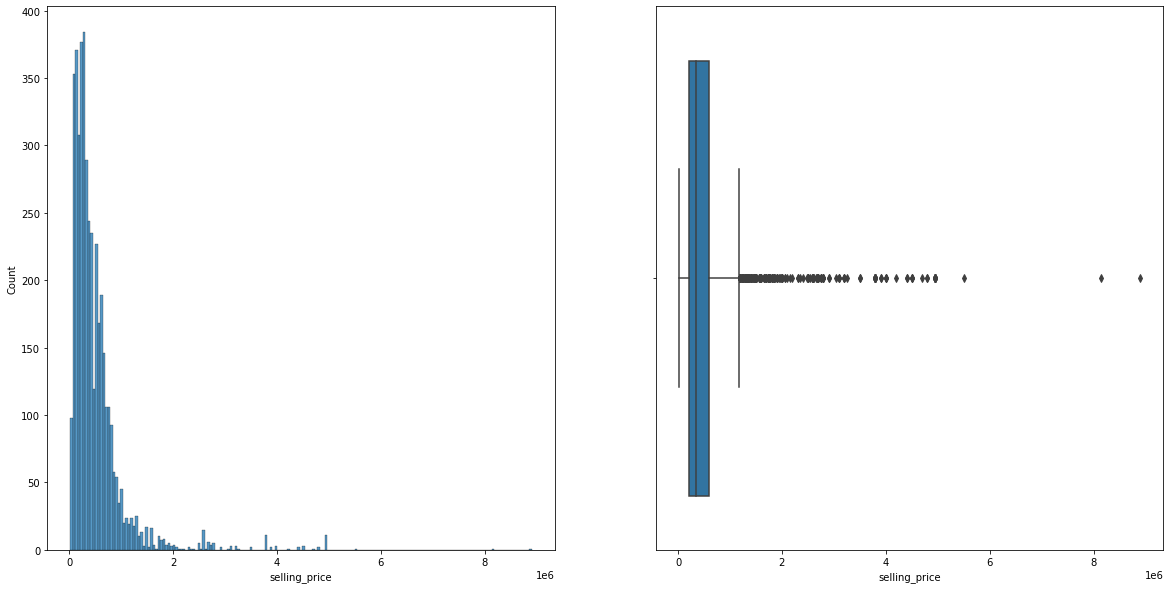

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=df, x="selling_price")
plt.subplot(1,2,2)
sns.boxplot(data=df, x="selling_price")
plt.plot()

# Observations
1. Most of the cars are sold within 1.5 lacs Rupees, and the least amount for a sold car was 20000.  
2. We can see that very few cars were sold for a price > 5 lacs Rupees. They can be premium cars or just bought cars.  
3. Selling_Price is highly skewed(right skewed).  
4. There are outliers, check next plot to check.

<AxesSubplot:xlabel='selling_price', ylabel='name'>

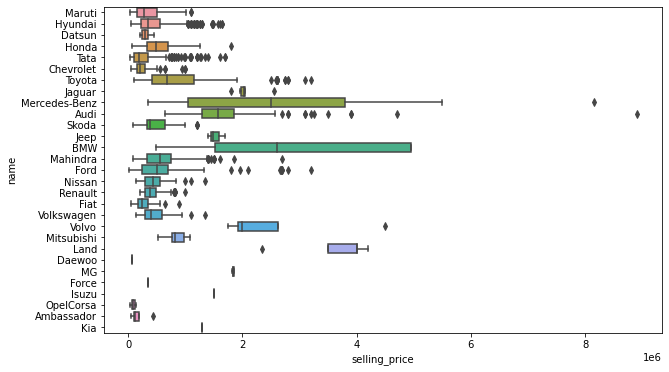

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="selling_price", y="name")

Observations:  
**Outliers are basically due to Premium vehicles and because of Cars from certain group of companies.**

**Q How no. of previous owners and fuel base affects price?**

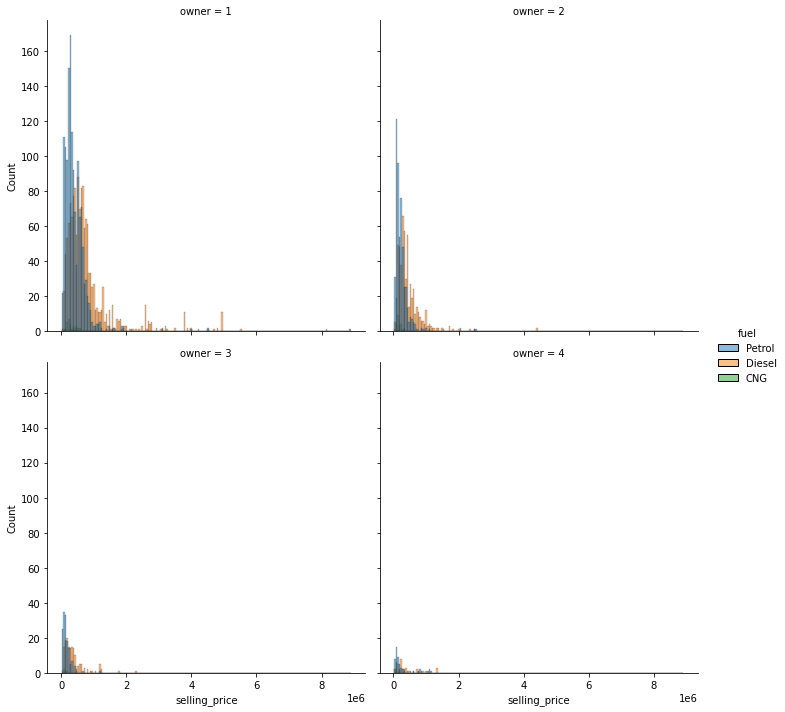

In [34]:
sns.displot(data=df, x="selling_price", col = "owner", col_wrap=2, hue="fuel")

# Observations
1. The people who own a Diesel based car are more paid when compared to Petrol based cars.  
2. Most of the Petrol based cars are sold for a price less than 2 lacs.
3. For cars whose owners are above 2 are paid below 1 Lacs.  

**Q Does OLD IS GOLD applicable in Indian Market??**

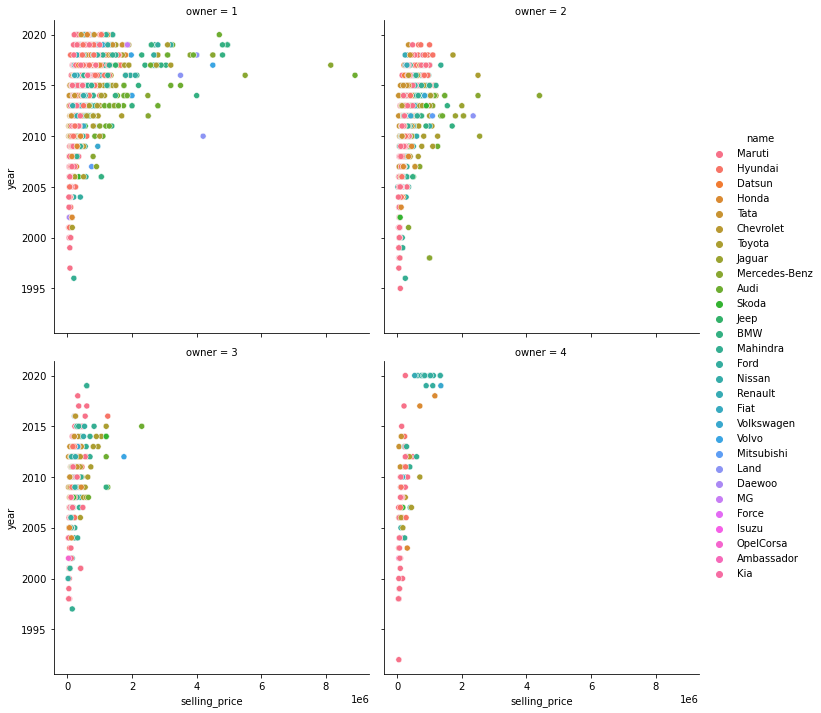

In [35]:
sns.relplot(data=df,x="selling_price", y="year", col="owner", col_wrap=2, hue= "name")

# Observations 
1. Only premium cars are sold for >5 lacs, which is sensible compared to their original retail price.  
2. People don't prefer old cars so OLD IS GOLD isn't applicable, as Indian's don't prefer refurbished products.  

**Q How Km's run can affect selling price ?**

               selling_price  km_driven
selling_price       1.000000  -0.192298
km_driven          -0.192298   1.000000


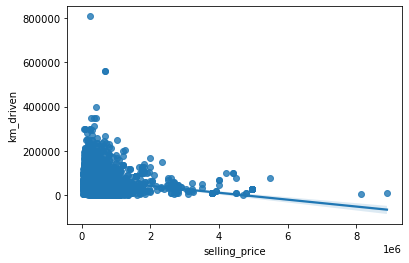

In [36]:
sns.regplot(data=df,x="selling_price",y="km_driven")
print(df[["selling_price","km_driven"]].corr())

# Observations
1. There is very weak correlation b/w "selling_price" and "km_driven".  
2. We can see that less the distance  driven greater the chances for high selling price.  
3. Even there are points which have low selling_price for less km's driven, might be due to bulit year and Company.  

**Q How the fields like km_driven and company can help to get a good selling price based on last 3 years!!**

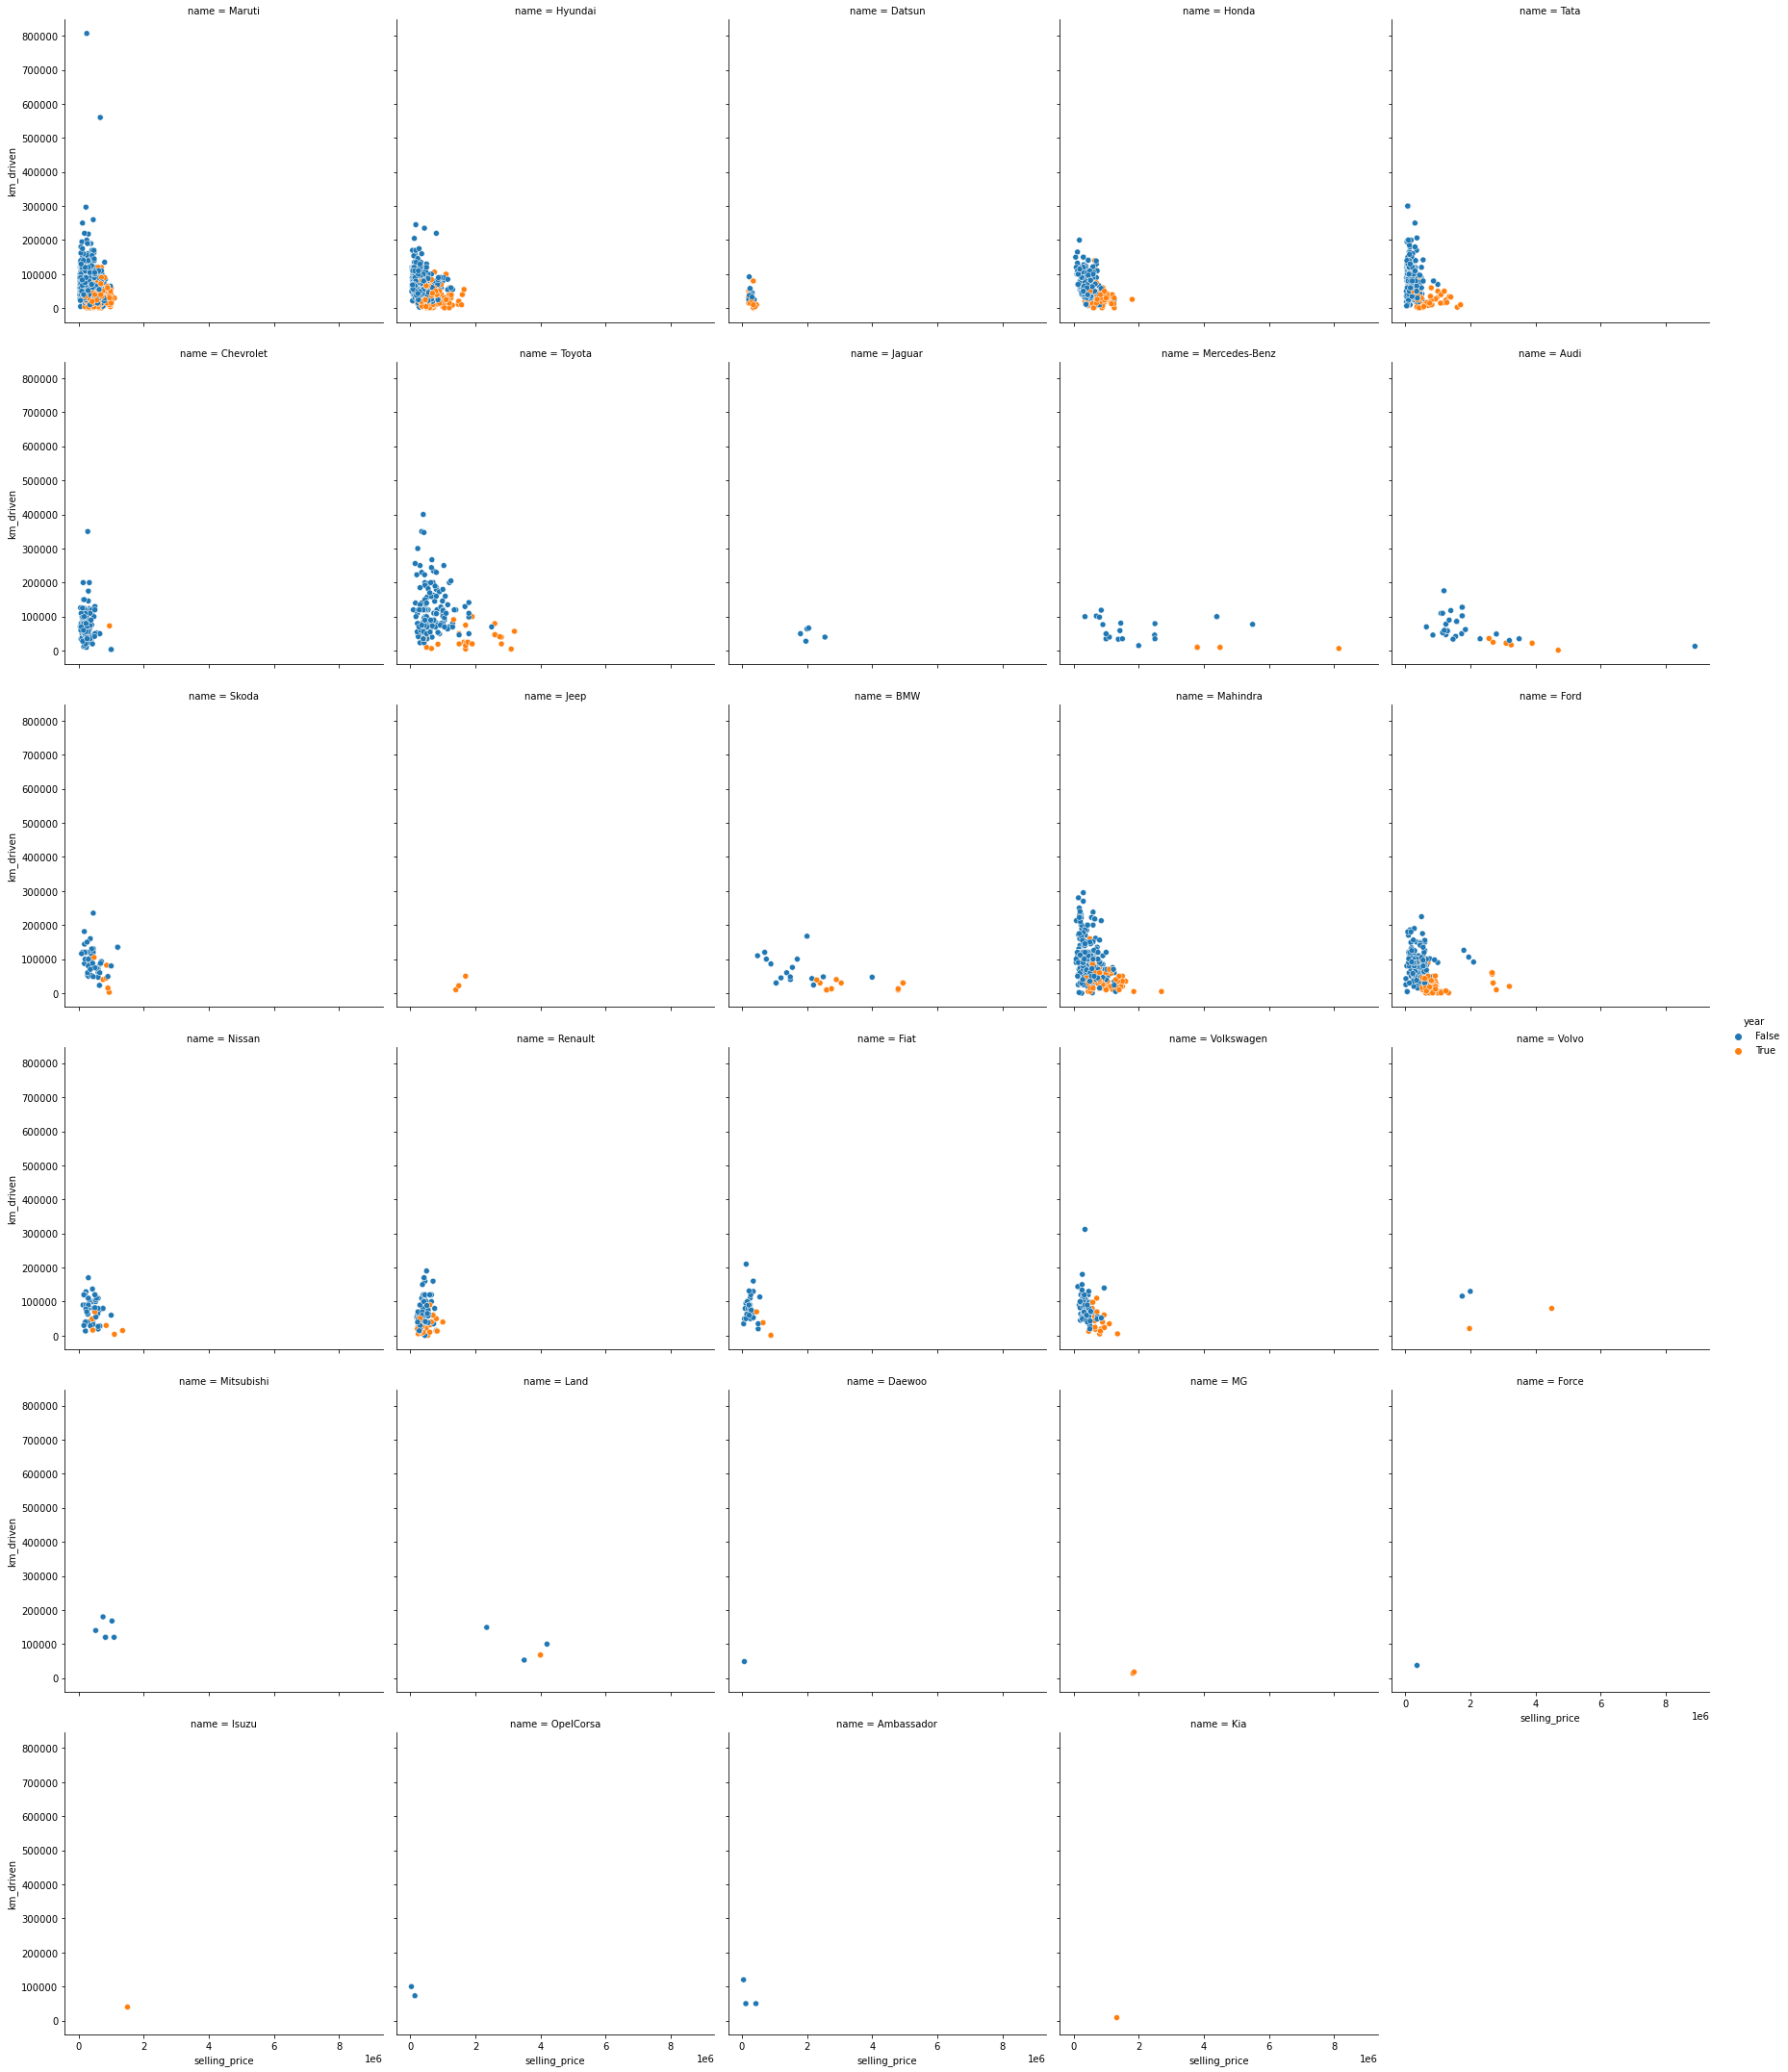

In [37]:
sns.relplot(data=df,x="selling_price",y="km_driven", col = "name", col_wrap=5,hue = df.year > 2016)# hue = "")

# Observations
1. For companies like Maruti, Hyundai, Tata and Honda selling them before 100Km's can fetch a good selling price as they make budget friendly cars.  
2. But for premium cars though the owner didn't have high km's fetching a good price is tough as they fetch a maximum price of 6 lacs. Compared to their original retail price price it's not even 30% in some cases.  
3. Premium cars have low resale value. 

**Q Owner's prefer which type of transmission and fuel base in past 3 years ?**

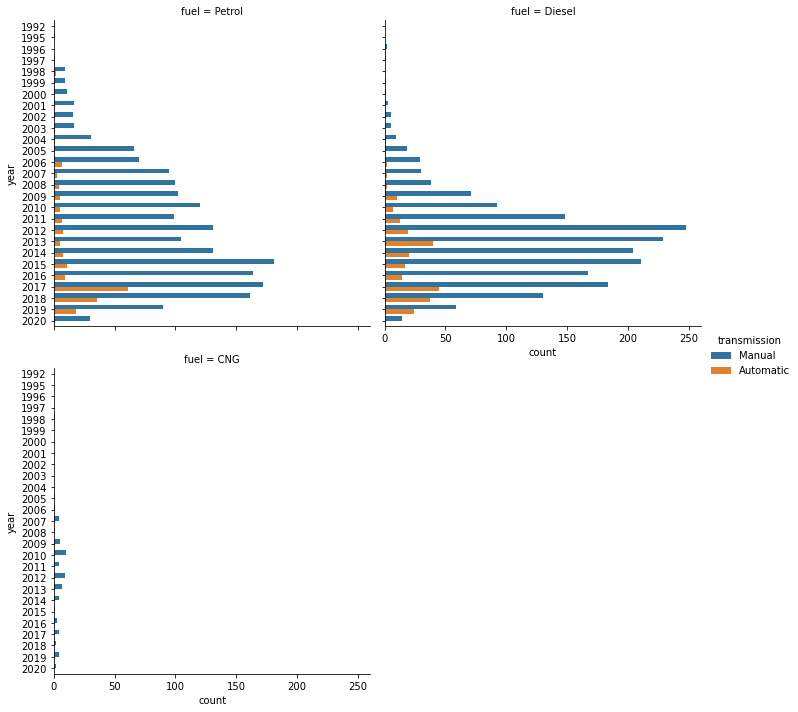

In [38]:
sns.catplot(data=df, y ="year",kind="count", col= "fuel", hue= "transmission", col_wrap=2)

**Answer : Owner's prefer Diesel with manual transmission in the past 3 years.**

In [39]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda,2014,450000,141000,Diesel,Individual,Manual,2


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
df["name"]=le.fit_transform(df["name"])

In [42]:
# required for server side
import pickle

file = open("le.pkl","wb")
pickle.dump(le,file)
file.close()

In [43]:
x="Audi"

In [44]:
le.transform([x])[0]

1

In [45]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Ambassador': 0, 'Audi': 1, 'BMW': 2, 'Chevrolet': 3, 'Daewoo': 4, 'Datsun': 5, 'Fiat': 6, 'Force': 7, 'Ford': 8, 'Honda': 9, 'Hyundai': 10, 'Isuzu': 11, 'Jaguar': 12, 'Jeep': 13, 'Kia': 14, 'Land': 15, 'MG': 16, 'Mahindra': 17, 'Maruti': 18, 'Mercedes-Benz': 19, 'Mitsubishi': 20, 'Nissan': 21, 'OpelCorsa': 22, 'Renault': 23, 'Skoda': 24, 'Tata': 25, 'Toyota': 26, 'Volkswagen': 27, 'Volvo': 28}


In [46]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,18,2007,60000,70000,Petrol,Individual,Manual,1
1,18,2007,135000,50000,Petrol,Individual,Manual,1
2,10,2012,600000,100000,Diesel,Individual,Manual,1
3,5,2017,250000,46000,Petrol,Individual,Manual,1
4,9,2014,450000,141000,Diesel,Individual,Manual,2


In [47]:
dummy_data = pd.get_dummies(df,drop_first=True)

In [48]:
dummy_data.head()

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_2,owner_3,owner_4
0,18,2007,60000,70000,0,1,1,1,0,0,0
1,18,2007,135000,50000,0,1,1,1,0,0,0
2,10,2012,600000,100000,1,0,1,1,0,0,0
3,5,2017,250000,46000,0,1,1,1,0,0,0
4,9,2014,450000,141000,1,0,1,1,1,0,0


In [49]:
temp = dummy_data.pop("selling_price")

In [100]:
temp[:10]

0     60000
1    135000
2    600000
3    250000
4    450000
5    140000
6    550000
7    240000
8    850000
9    365000
Name: selling_price, dtype: int64

In [50]:
# adding another feature to dataset
dummy_data["old"]=2020-dummy_data.year

In [51]:
dummy_data.head()

,name,year,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_2,owner_3,owner_4,old
0,18,2007,70000,0,1,1,1,0,0,0,13
1,18,2007,50000,0,1,1,1,0,0,0,13
2,10,2012,100000,1,0,1,1,0,0,0,8
3,5,2017,46000,0,1,1,1,0,0,0,3
4,9,2014,141000,1,0,1,1,1,0,0,6


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data,temp)

In [88]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3254, 11) (1085, 11) (3254,) (1085,)


In [89]:
X_train.head()

,name,year,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_2,owner_3,owner_4,old
1241,9,2015,66755,1,0,0,1,0,0,0,5
1153,25,2012,65000,1,0,0,1,0,0,0,8
1942,18,2008,152000,0,0,1,1,1,0,0,12
632,17,2016,35000,1,0,1,1,0,0,0,4
1494,10,2006,40000,0,1,1,1,1,0,0,14


# Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [91]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [92]:
predictions = clf.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [94]:
mean_absolute_error(y_test,predictions)

131733.27114603634

In [95]:
mean_absolute_percentage_error(y_test,predictions)*100

33.72325316397876

In [96]:
np.sqrt(mean_squared_error(y_test,predictions))

257512.6549033473

In [97]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter Tuning

In [98]:
g_clf = RandomizedSearchCV(clf,{"n_estimators":[int(x) for x in np.linspace(100,1200,12)], 
                                "min_samples_split":[2**i for i in range(0,7)],
                                "max_features":["auto","sqrt"],
                                "max_depth":[int(x) for x in np.linspace(5,30,6)],
                                "min_samples_leaf":[1,2,5,10]
                               },cv=10)

In [99]:
g_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 4, 8, 16,
                                                              32, 64],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [101]:
#score after hyperparamter tuning
g_clf.best_score_

0.6934485435817327

In [102]:
# best parameters after hyperparameter
g_clf.best_params_

{'n_estimators': 800,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [103]:
t_clf = RandomForestRegressor(min_samples_split=g_clf.best_params_['min_samples_split'], n_estimators=g_clf.best_params_['n_estimators'],
                              min_samples_leaf=g_clf.best_params_["min_samples_leaf"],max_features=g_clf.best_params_['max_features'],
                              max_depth=g_clf.best_params_['max_depth']
                             )
t_clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_split=4, n_estimators=800)

In [104]:
predictions = t_clf.predict(X_test)

In [105]:
mean_absolute_percentage_error(y_test,predictions)*100

33.87274178425664

In [76]:
np.sqrt(mean_squared_error(y_test,predictions))

339670.2009666037

In [ ]:
'''
file = open("model.pkl","wb")
pickle.dump(t_clf,file)
file.close()
'''

In [106]:
file = open("model.pkl","rb")
model = pickle.load(file)
file.close()

In [71]:
le.transform(["Maruti"])[0]

18

In [112]:
round(t_clf.predict([[le.transform(["Hyundai"])[0],2015,35000,1,0,1,1,0,0,0,5]])[0],2)

539593.47

In [111]:
round(model.predict([[le.transform(["Hyundai"])[0],2015,35000,1,0,1,1,0,0,0,5]])[0],2)

536757.09